# Fetal Health Classification Prototype

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df_encoded.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency_-1.0,histogram_tendency_0.0,histogram_tendency_1.0,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,2.0,0.0,120.0,137.0,121.0,73.0,0.0,0.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,11.0,0.0,137.0,134.0,137.0,13.0,0.0,0.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,9.0,0.0,137.0,136.0,138.0,11.0,0.0,0.0,1.0,1.0


Before we begin training the prototype model, we'll change the target feature into integers. For reference, <br>
- 1: Normal
- 2: Suspect
- 3: Pathological

There are no redudnant columns either so we can move straight into training a baseline model. I'll be using a random forest as the baseline.

In [4]:
df['fetal_health']= df['fetal_health'].astype(int)
df['fetal_health'].dtype

dtype('int64')

Even with minimal preprocessing, the prototype is performing well. As expected, the suspect and pathological classes show the lowest performance, particularly in terms of recall and F1-score. False negatives in these classes can have deadly consequences, so improving recall and F1-score is the priority. A macro-averaged F1-score will be the main metric to evaluate the performance of the model, alongside a confusion matrix.

The confusion matrix highlights that the suspect class is most frequently misclassified.

              precision    recall  f1-score   support

      Normal       0.95      0.98      0.96       332
     Suspect       0.87      0.69      0.77        59
Pathological       0.88      0.83      0.85        35

    accuracy                           0.93       426
   macro avg       0.90      0.84      0.86       426
weighted avg       0.93      0.93      0.93       426



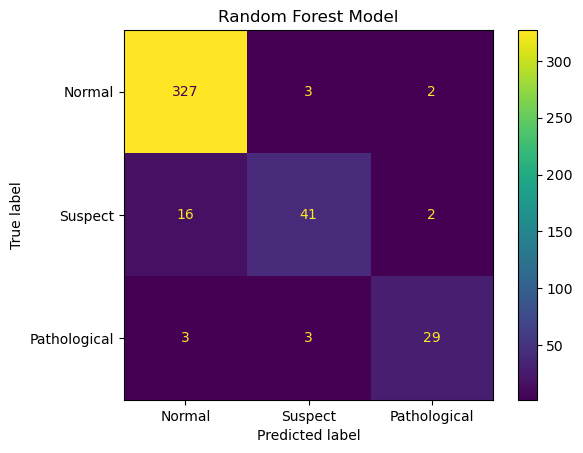

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the X and y variables
X = df.drop(["fetal_health"], axis=1)
y = df['fetal_health']

# Split into training and test sets, making sure to stratify since there's an imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create and train the random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Display the per-class metrics 
target_names = ["Normal", "Suspect", "Pathological"]
print(classification_report(y_test, y_pred, target_names=target_names))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
ax = disp.plot().ax_
ax.set_title("Random Forest Model")
plt.show()